## **Notebook EC#03**
## Convolutional classifier for MNIST and CIFAR-10 databases.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Túlio Queiroz de Paula


In [7]:
import tensorflow as tf
import os
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Reshape to be [samples][width][height][channels]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10)
model.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model.to_json()
json_file = open("model_CNN_MNIST.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("model_CNN_MNIST.weights.h5")
print("Model saved to disk")
# os.getcwd()

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 35ms/step - accuracy: 0.8813 - loss: 0.3757
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9757 - loss: 0.0824
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 35ms/step - accuracy: 0.9799 - loss: 0.0634
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9839 - loss: 0.0516
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9876 - loss: 0.0404
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9883 - loss: 0.0370
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9896 - loss: 0.0315
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9908 - loss: 0.0284
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9911 - loss: 0.0282
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9923 - loss: 0.0239


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,599,648 (13.73 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,399,766 (9.15 MB)

Evaluate on test data
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9883 - loss: 0.0397
test loss, test acc: [0.03180592507123947, 0.9908999800682068]
Model saved to disk


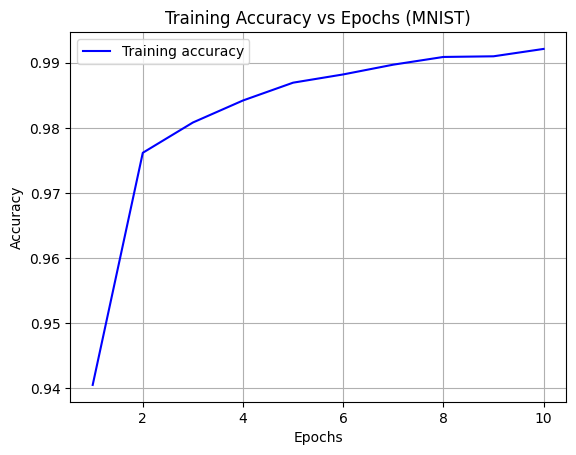

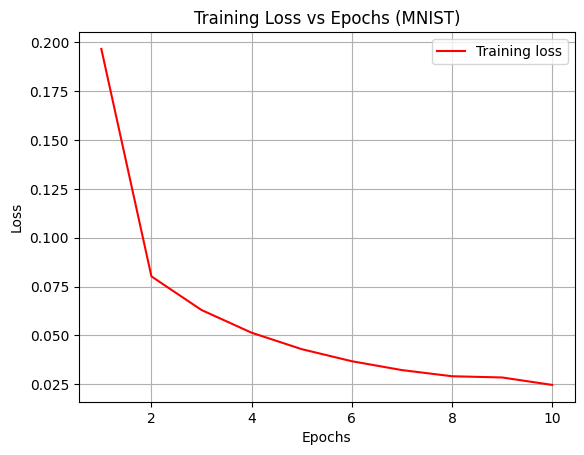

In [8]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (MNIST)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [9]:
import tensorflow as tf
import os

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                                 activation='relu',
                                 input_shape=(32, 32, 3)))
model1.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(tf.keras.layers.Dropout(0.25))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = model1.fit(x_train, y_train, epochs=10)
model1.summary()

# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(x_test, y_test)
print("test loss, test acc:", results)

# Saving the model to disk
model_json = model1.to_json()
json_file = open("model_CNN_CIFAR10.json", "w")
json_file.write(model_json)
json_file.close()
model1.save_weights("model_CNN_CIFAR10.weights.h5")
print("Model saved to disk")
# os.getcwd()

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 44ms/step - accuracy: 0.3585 - loss: 1.7710
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.5496 - loss: 1.2726
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6015 - loss: 1.1305
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6315 - loss: 1.0432
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.6560 - loss: 0.9658
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6753 - loss: 0.9109
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.6886 - loss: 0.8702
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7042 - loss: 0.8255
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.7165 - loss: 0.8012
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.7278 - loss: 0.7584


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,879,328 (18.61 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,252,886 (12.41 MB)

Evaluate on test data
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6875 - loss: 0.9075
test loss, test acc: [0.9063884615898132, 0.6858999729156494]
Model saved to disk


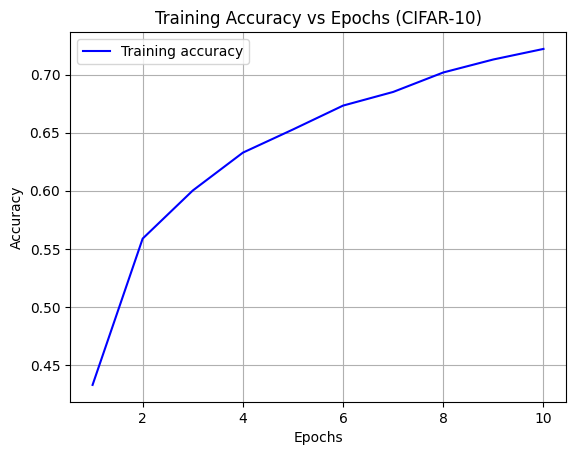

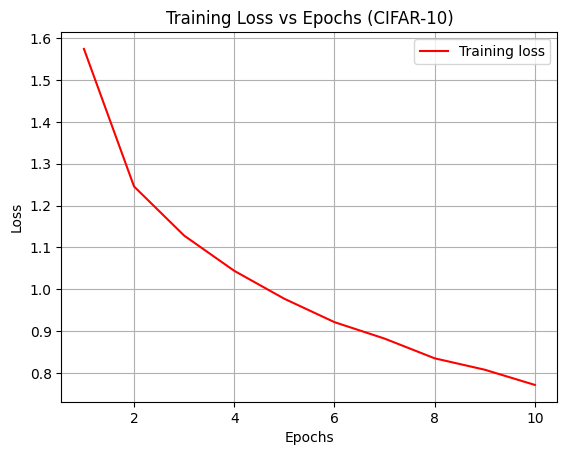

In [10]:
# Behavior along the training process
import matplotlib.pyplot as plt

acc = history1.history['accuracy']
loss = history1.history['loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training Accuracy vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training Loss vs Epochs (CIFAR-10)')
plt.legend()
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [12]:
# Summary of the obtained results for the MNIST database
classifier1 = 'Linear           '
classifier2 = 'MLP              '
classifier3 = 'CNN              '
print('--------------------------------------------------')
print('|       Accuracy for the MNIST database          |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
print('| %s: \t\t\t%f |'% (classifier1,0.8617))
print('| %s: \t\t\t%f |'% (classifier2,0.9853000044822693))
print('| %s: \t\t\t%f |'% (classifier3,0.9908999800682068))
print('--------------------------------------------------')

--------------------------------------------------
|       Accuracy for the MNIST database          |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear           : 			0.861700 |
| MLP              : 			0.985300 |
| CNN              : 			0.990900 |
--------------------------------------------------


In [13]:
# Summary of the obtained results for the CIFAR10 database
classifier1 = 'Linear           '
classifier2 = 'MLP              '
classifier3 = 'CNN              '
print('--------------------------------------------------')
print('|      Accuracy for the CIFAR10 database         |')
print('--------------------------------------------------')
print('|Classifier type \t Accuracy                |')
print('--------------------------------------------------')
print('| %s: \t\t\t%f |'% (classifier1,0.4078))
print('| %s: \t\t\t%f |'% (classifier2,0.5422000288963318))
print('| %s: \t\t\t%f |'% (classifier3,0.6858999729156494))
print('--------------------------------------------------')

--------------------------------------------------
|      Accuracy for the CIFAR10 database         |
--------------------------------------------------
|Classifier type 	 Accuracy                |
--------------------------------------------------
| Linear           : 			0.407800 |
| MLP              : 			0.542200 |
| CNN              : 			0.685900 |
--------------------------------------------------
